In [1]:
print("2015-03-01".replace("-", "")[2:6])

1503


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import math

import pandas as pd
from pathlib import Path
import os

from matplotlib.patches import Patch

plt.style.use('presentation.mplstyle')

## Compare two things from average_values_suffix.csv

In [3]:
def plot_average_values_comparison(avg_values, color_map, labels, categories, title, label_size=20):

    title_map = {
        'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
        'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
        'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
        'total tardiness': 'Average Total Tardiness (days)', 
        'number of patients tardy': 'Average Number Patients Tardy', 
        'total surgeries completed': 'Average Number of Surgeries Scheduled', 
        'total cancelled inconvenient': 'Average Number of Surgeries Cancelled \ndue to Inconvenience',
        'total cancelled overtime': 'Average Number of Surgeries Cancelled \ndue to Over Time',
        'cancelation proportion': 'Proportion of Surgeries Cancelled',
        'total time operating': 'Average Time Spent Operating',
        'average overtime': 'Average amount of Overtime Worked',    
        'average utilisation': 'Average Session Utilisation',
    }

    # Get colors for each label
    colors = [color_map[label] for label in labels]

    # Create a 3x3 subplot
    fig, axes = plt.subplots(math.ceil(len(categories)/3), 3, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    num_categories = len(categories)

    # Plot each bar graph
    for i in range(num_categories):
        bars = axes[i].bar(labels, avg_values[categories[i]].values, color=colors)
        axes[i].set_title(title_map[categories[i]], fontsize=16)
        # Add labels
        for bar in bars:
            yval = round(bar.get_height(), 2)
            axes[i].text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=label_size)

    for i in range(num_categories, len(axes)):
        fig.delaxes(axes[i])

    # Create custom legend handles
    handles = [Patch(color=color_map[label], label=label) for label in labels]

    # Add the legend to the figure
    fig.legend(handles=handles, loc='lower right', title='Labels', prop={'size': 20})
    # fig.suptitle(title, fontsize=24)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

### Plot Baseline

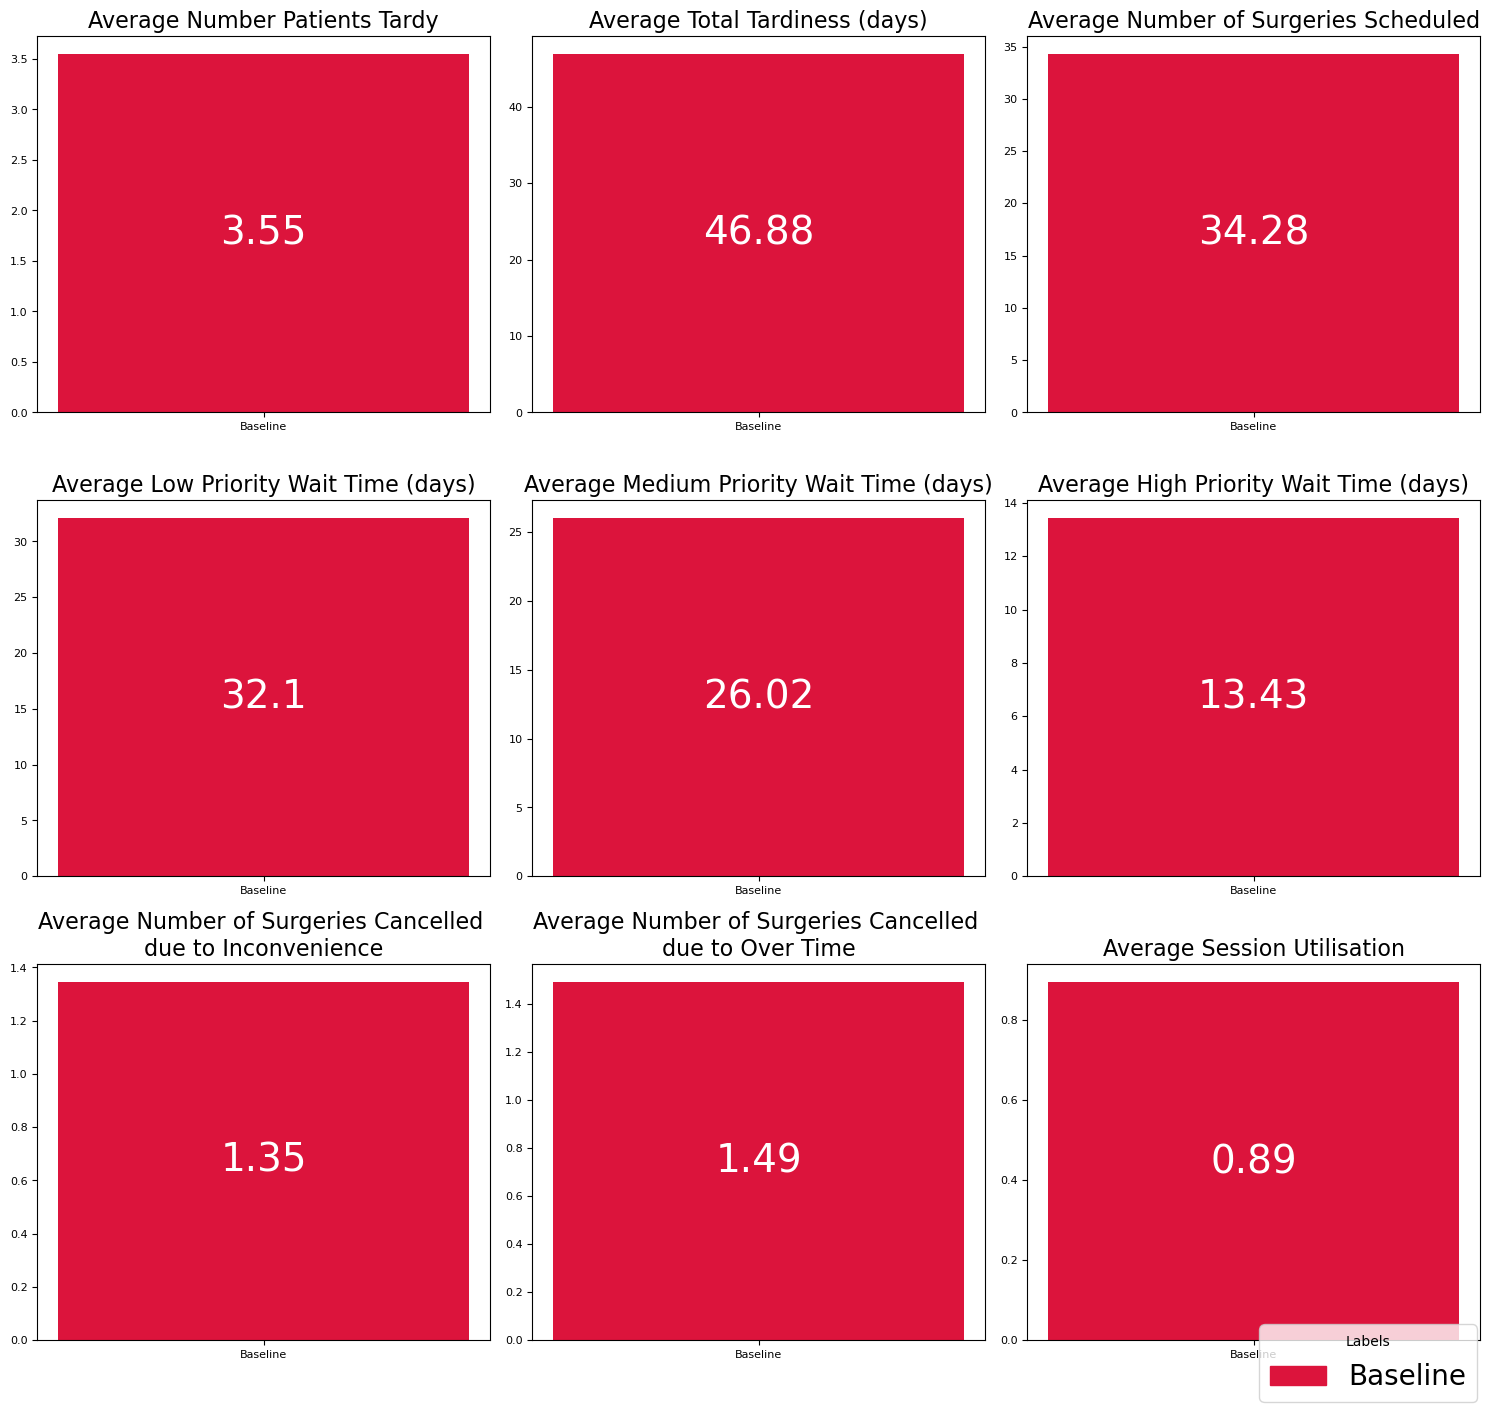

In [34]:
# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databases'))
csv_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_1503_ed_1603_ipic_F_idce_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")

#read in df
avg_values_pi = pd.read_csv(csv_path)

#read in df
avg_values_pi = pd.read_csv(csv_path)

# Labels for the bars
labels = ['Baseline']

# Define colors for each label
color_map = {
    'Baseline': '#DC143C'
}

categories = [
        'num_sessions', 'number of patients tardy', 'total tardiness', 'total surgeries completed', 
        'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
        'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
        'average utilisation',
    ]

title = "Comparison of Schedule Metrics with and without Inconvenience Information (all taken across 52 weeks)"

plot_average_values_comparison(avg_values=avg_values_pi, labels=labels, color_map=color_map, categories=categories, title=title, label_size=28)

### Compare perfect vs imperfect info (Brodie)

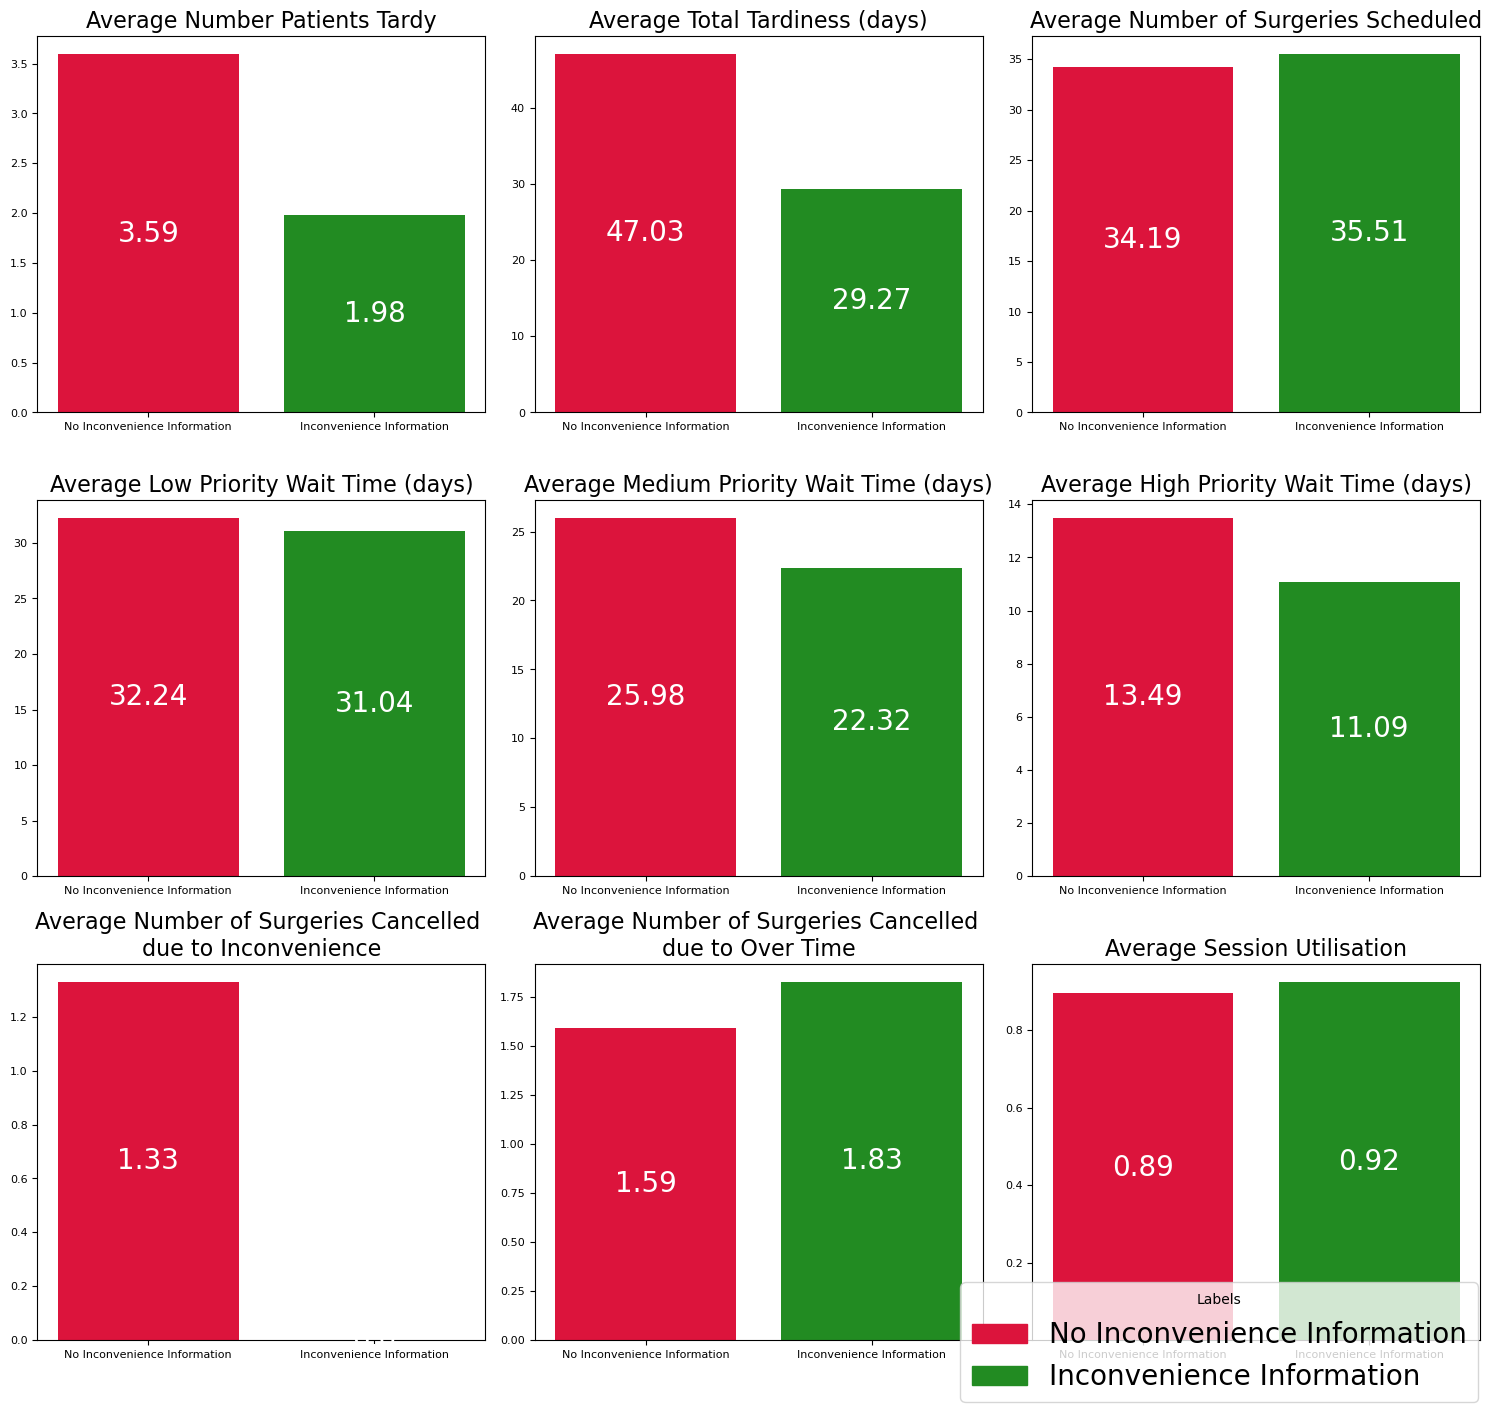

In [43]:
# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databases'))
csv_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_1503_ed_1603_ipic_T_idce_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")

#read in df
avg_values_pi = pd.read_csv(csv_path)

# Labels for the bars
labels = ['No Inconvenience Information', 'Inconvenience Information']

# Define colors for each label
color_map = {
    'Inconvenience Information': '#228B22',
    'No Inconvenience Information': '#DC143C',
}

categories = [
        'number of patients tardy', 'total tardiness', 'total surgeries completed', 
        'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
        'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
        'average utilisation',
    ]

title = "Comparison of Schedule Metrics with and without Inconvenience Information (all taken across 52 weeks)"

plot_average_values_comparison(avg_values=avg_values_pi, labels=labels, color_map=color_map, categories=categories, title=title)


### Compare Disruption Constraint vs no disruption constraint (mdp=14, mds=14) (Brodie)

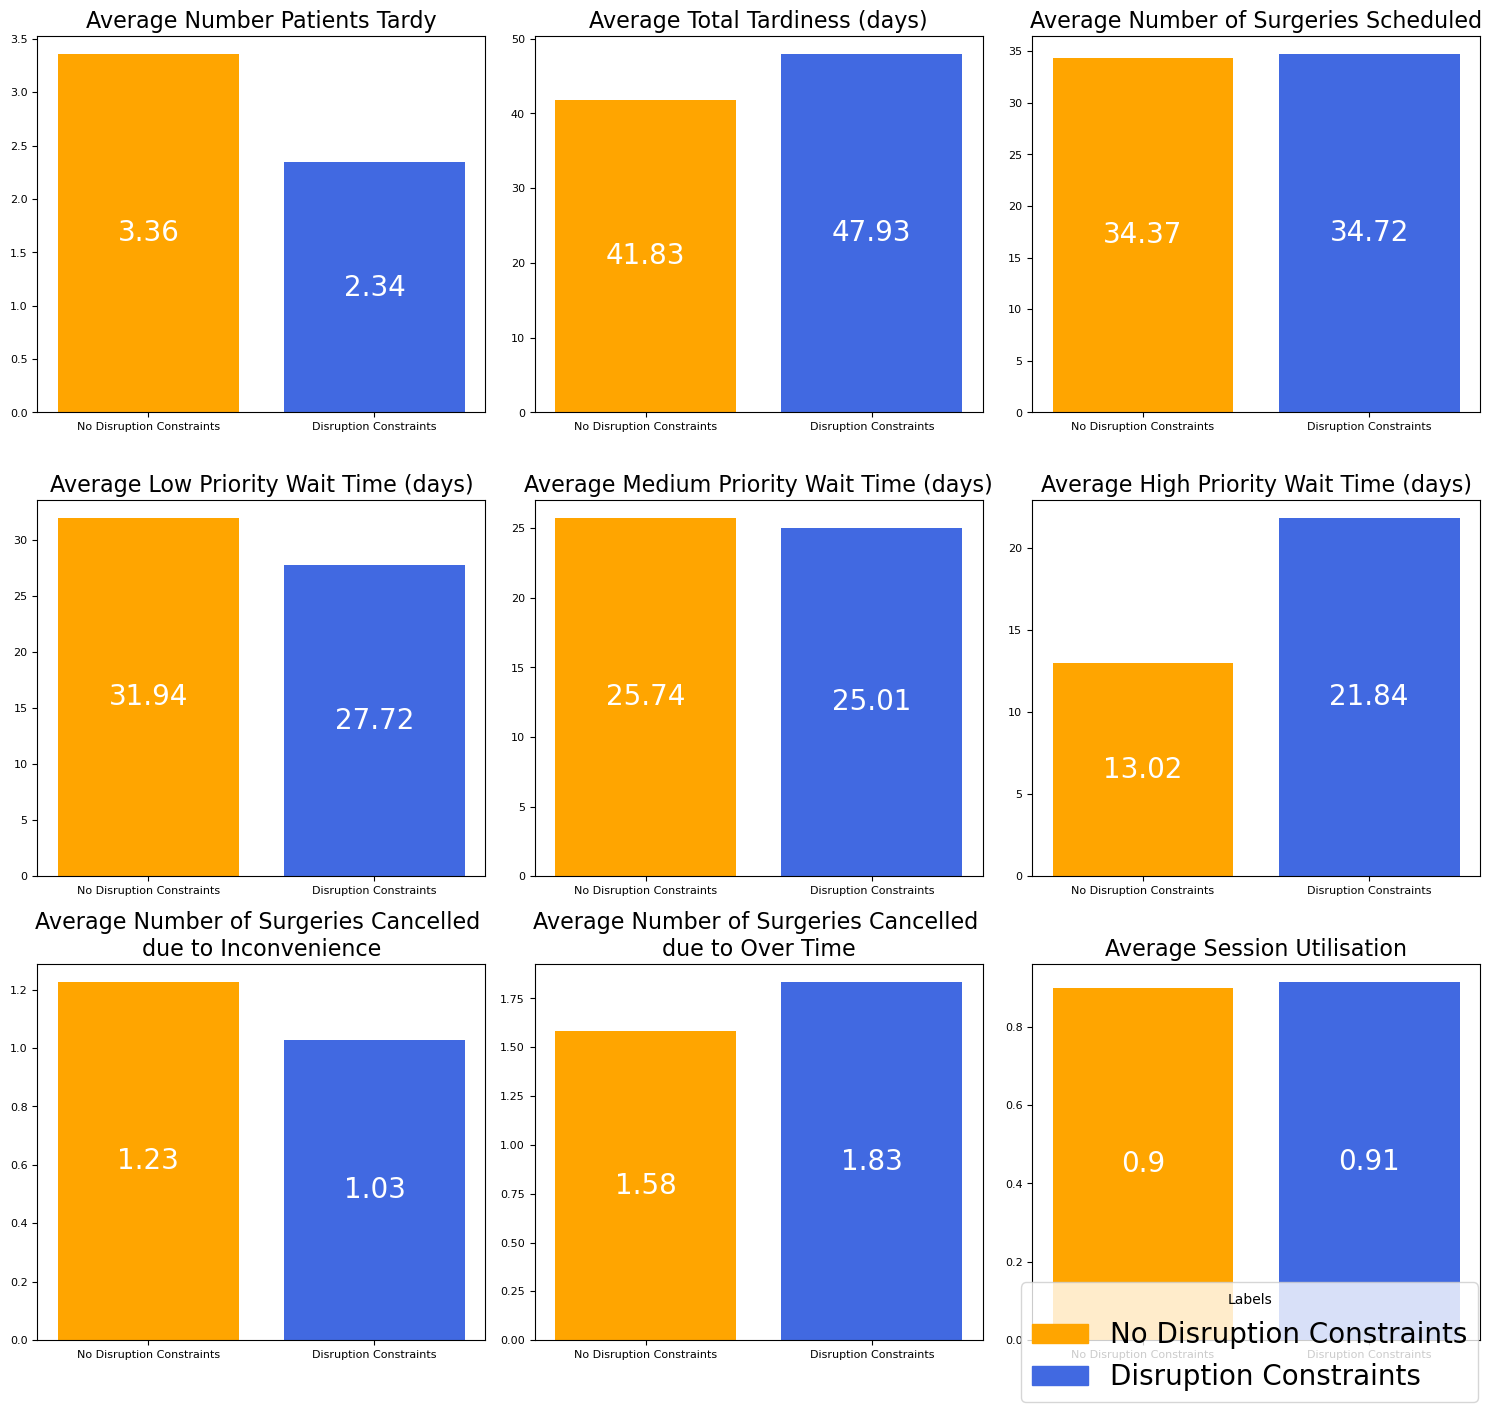

In [42]:
csv_disruption_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_1503_ed_1603_ipic_F_idce_T_mdp_14_mds_14_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")
#read in disruption
avg_values_disruption = pd.read_csv(csv_disruption_path)

# Labels for the bars
labels = ['No Disruption Constraints', 'Disruption Constraints']

# Define colors for each label
color_map = {
    'Disruption Constraints': '#4169E1',
    'No Disruption Constraints': '#FFA500',
}

categories = [
        'number of patients tardy', 'total tardiness', 'total surgeries completed', 
        'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
        'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
        'average utilisation',
    ]

# Get colors for each label
colors = [color_map[label] for label in labels]

plot_average_values_comparison(avg_values=avg_values_disruption, labels=labels, color_map=color_map, categories=categories, title=title)



### Disruption constraint comparison (with shift) (Brodie)

In [44]:
# csv_disruption_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_0301_ed_0301_ipic_F_idce_T_mdp_28_mds_28_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")
# #read in disruption
# avg_values_disruption = pd.read_csv(csv_disruption_path)

# csv_baseline_path = os.path.join(OUTPUT_DIR, "average_values_s_0_f_A_sd_0301_ed_0301_ipic_F_idce_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")
# #read in disruption
# baseline = pd.read_csv(csv_baseline_path)

# avg_values_disruption_comparison = pd.concat([avg_values_disruption, baseline], axis=0, ignore_index=True)

# # Labels for the bars
# labels = ['No Disruption Constraints', 'Disruption Constraints']

# # Define colors for each label
# color_map = {
#     'Disruption Constraints': '#4169E1',
#     'No Disruption Constraints': '#FFA500',
# }

# categories = [
#         'number of patients tardy', 'total tardiness', 'total surgeries completed', 
#         'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
#         'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
#         'average utilisation',
#     ]

# # Get colors for each label
# colors = [color_map[label] for label in labels]

# plot_average_values_comparison(avg_values=avg_values_disruption_comparison, labels=labels, color_map=color_map, categories=categories, title=title)



## Do Numerical Comparisons of Difference on metrics_suffix

### Quantifying disruption constraint difference with plots and t-test

In [8]:
import pandas as pd
from scipy import stats

def plot_numerical_difference(metrics, categories, seperation_category):
    # Separate data by perfect_information_bool
    grouped_data = metrics.groupby(seperation_category)

    # List to hold the results
    results_list = []

    # Perform one-sample t-test for each column in columns_to_plot
    # against the overall mean of the column or a specified value
    for column in categories:
        overall_mean = metrics[column].mean()  # Can be replaced with a specific value if needed
        
        for name, group in grouped_data:
            # Extract data for the current group
            data = group[column].dropna()  # Drop NaN values for the t-test
            
            # Perform the t-test against the overall mean
            t_stat, p_value = stats.ttest_1samp(data, overall_mean)
            
            # Append the result to the list
            results_list.append({
                'Metric': column,
                seperation_category: name,
                't-statistic': t_stat,
                'p-value': p_value
            })

    # Convert the results list to a DataFrame
    p_vals = pd.DataFrame(results_list)

    title_map = {
            'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
            'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
            'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
            'total tardiness': 'Average Total Tardiness (days)', 
            'number of patients tardy': 'Average Number Patients Tardy', 
            'total surgeries completed': 'Average Number of Surgeries Scheduled', 
            'total cancelled inconvenient': 'Average Number of Surgeries Cancelled \ndt Inconvenience',
            'total cancelled overtime': 'Average Number of Surgeries Cancelled \ndt Over Time',
            'cancelation proportion': 'Proportion of Surgeries Cancelled',
            'total time operating': 'Average Time Spent Operating',
            'average overtime': 'Average amount of Overtime Worked',
            'average utilisation': 'Average Session Utilisation',
        }

    group_settings = {}
    for cat in categories:
        group_settings[cat] = 'mean'

    avg_values = metrics.groupby(['iteration', seperation_category]).agg(group_settings).reset_index()

    nrows = math.ceil(len(categories)/3)

    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 10))


    for i, column in enumerate(categories, 0):
        #get p value
        p_val = p_vals[(p_vals['Metric'] == column) & (p_vals[seperation_category] == True)]['p-value'].iloc[0]
        formatted_p_val = "{:.2f}".format(p_val)
        

        avg_values.boxplot(column=column, by=seperation_category, ax=axes[math.floor(i/3), i - 3*math.floor(i/3)])
        axes[math.floor(i/3), i - 3*math.floor(i/3)].set_title(f"{title_map[column]} \n(p value = {formatted_p_val})", fontsize=16)
        axes[math.floor(i/3), i - 3*math.floor(i/3)].set_xlabel(seperation_category, fontsize=12)
        # axes[math.floor(i/3), i - 3*math.floor(i/3)].set_ylabel(title_mappings[column], fontsize=12)

        axes[math.floor(i/3), i - 3*math.floor(i/3)].tick_params(axis='both', which='major', labelsize=13)

    plt.suptitle('')  # Remove the default suptitle
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.subplots_adjust(hspace=1)
    plt.show()

### Do numerical comparison on perfect information (Brodie)

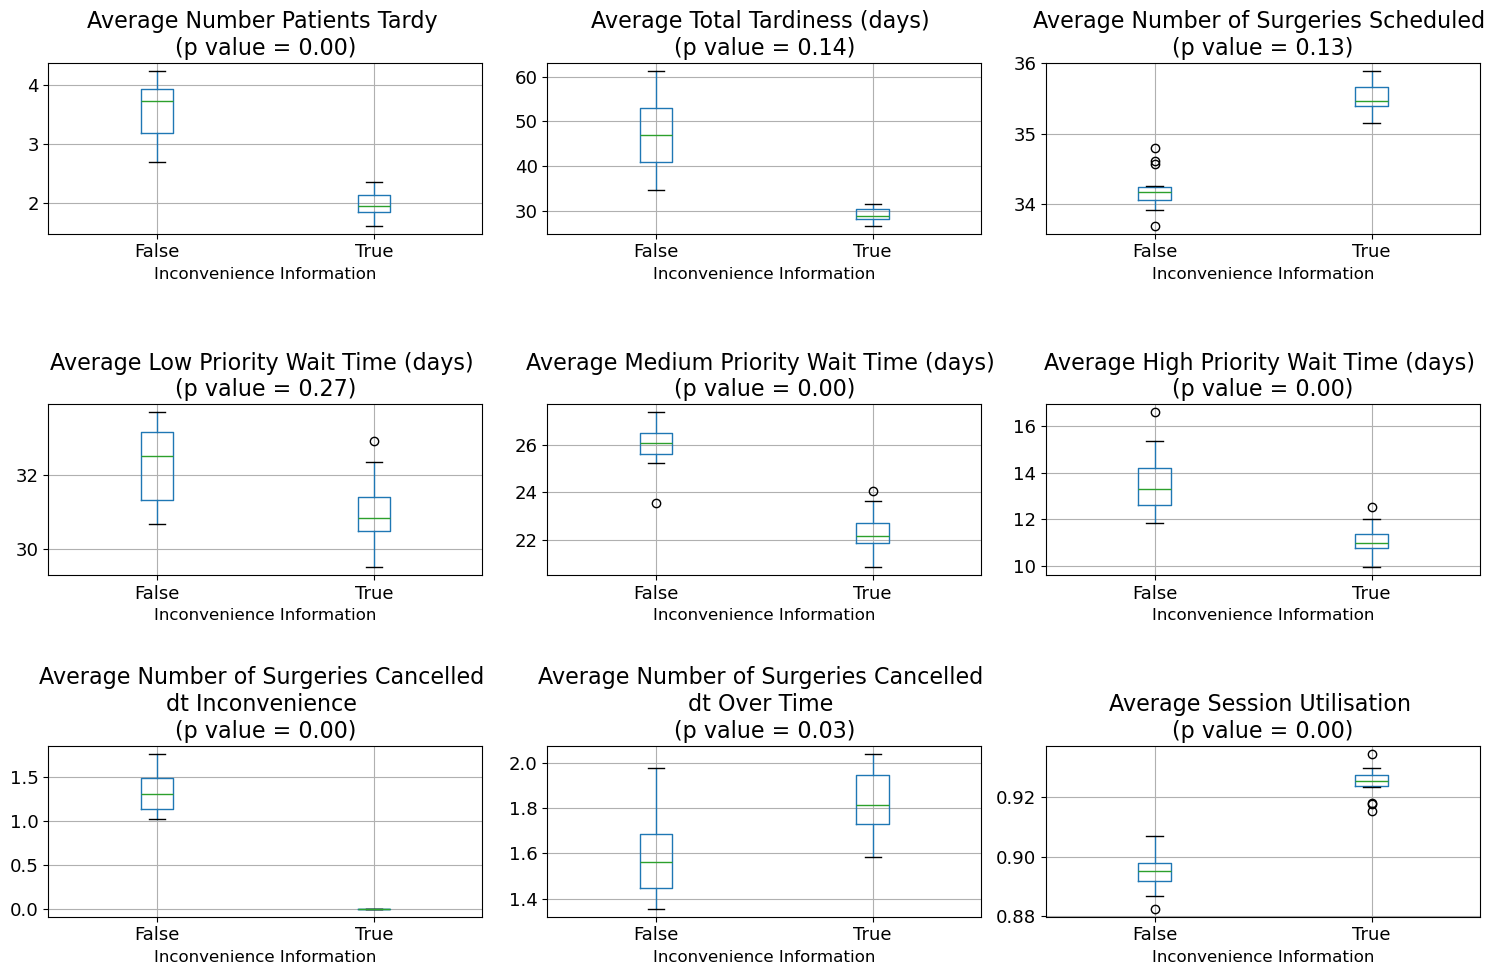

In [45]:
categories = [
        'number of patients tardy', 'total tardiness', 'total surgeries completed', 
        'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
        'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
        'average utilisation',
    ]

csv_pi_path = os.path.join(OUTPUT_DIR, "metricss_0_f_A_sd_1503_ed_1603_ipic_T_idce_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")
#load in metrics for perfect_info
pi_metrics = pd.read_csv(csv_pi_path)
#load in metrics for perfect_info

seperation_category = 'Inconvenience Information'

plot_numerical_difference(metrics=pi_metrics, categories=categories, seperation_category=seperation_category)


### Do Numerical comparison on disruption parameters (mdp=14, mds=14) (Brodie)

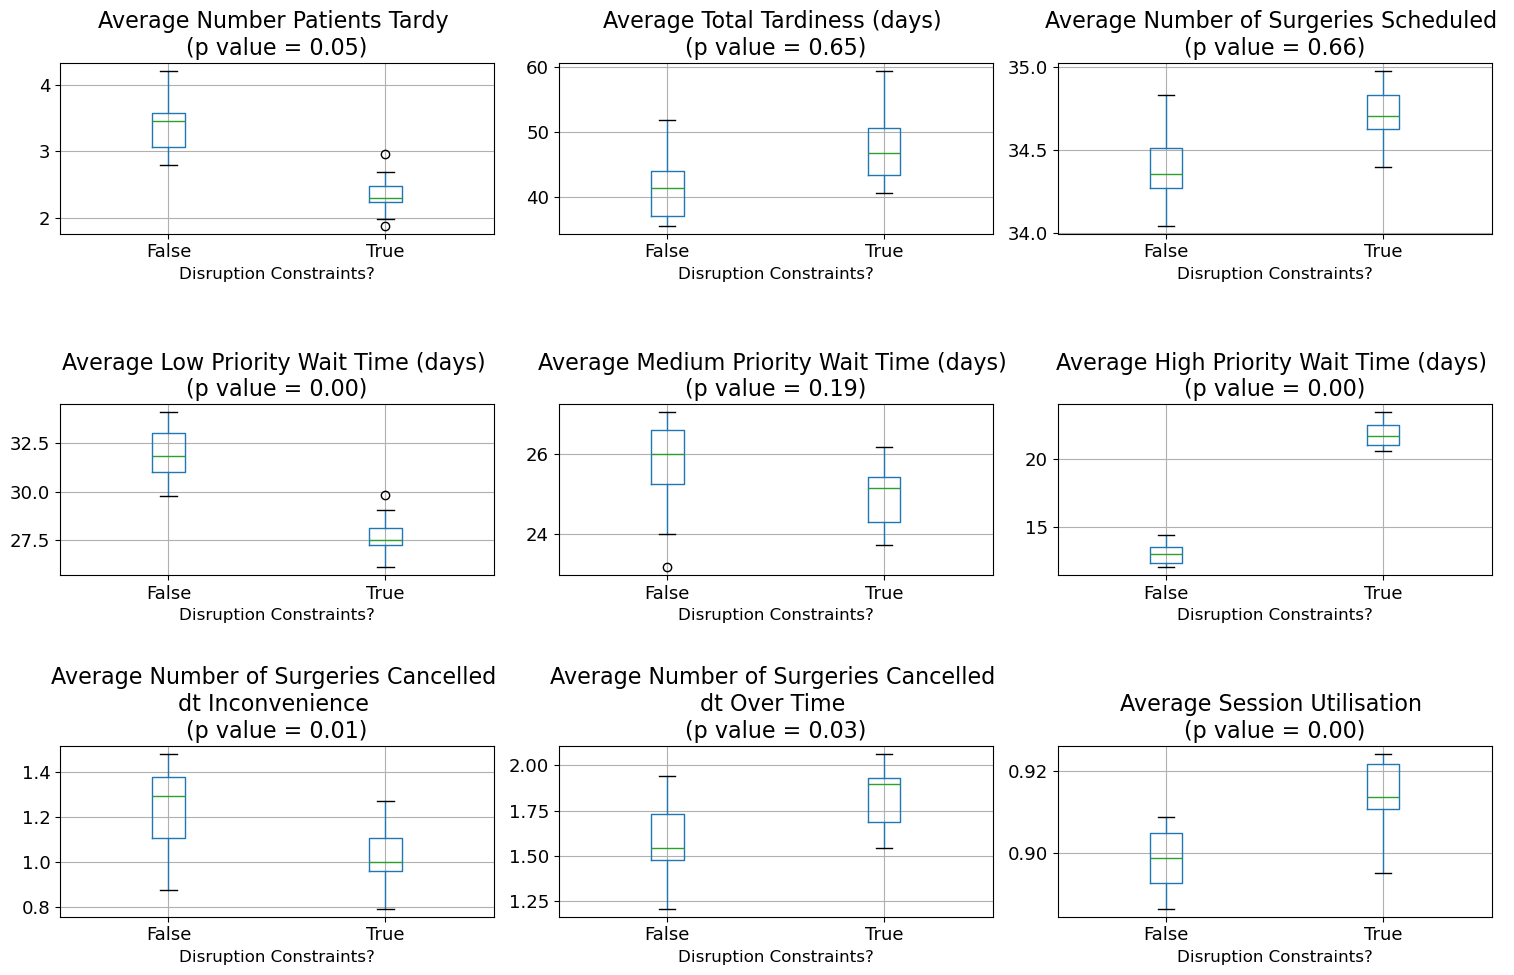

In [ ]:
categories = [
        'number of patients tardy', 'total tardiness', 'total surgeries completed', 
        'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
        'average wait time 0.66 < priority', 'total cancelled inconvenient','total cancelled overtime',
        'average utilisation',
    ]

csv_pi_path = os.path.join(OUTPUT_DIR, "metricss_0_f_A_sd_1503_ed_1603_ipic_F_idce_T_mdp_14_mds_14_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")
#load in metrics for perfect_info
pi_metrics = pd.read_csv(csv_pi_path)
#load in metrics for perfect_info

seperation_category = 'Disruption Constraints?'

plot_numerical_difference(metrics=pi_metrics, categories=categories, seperation_category=seperation_category)


### Brodie's extra disruption stuff

In [11]:
import pandas as pd

# Reading the CSV into a pandas DataFrame (you can replace 'your_csv_file.csv' with the actual file path)
csv_p_and_w = os.path.join(OUTPUT_DIR, "priority&warnings_0_f_A_sd_0301_ed_0301_ipic_T_idce_T_mdp_14_mds_14_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv")
#load in metrics for perfect_info
df = pd.read_csv(csv_p_and_w)

# Creating a new column 'time since last disruption when scheduled'
df['time since last disruption when scheduled'] = df['warning time'] * df['time in system']

# Grouping by iteration ('iter') to calculate summaries
summary = df.groupby('iter').agg(
    avg_disruptions=('count', 'mean'),
    max_disruptions=('count', 'max'),
    min_disruptions=('count', 'min'),
    avg_time_last_disruption=('time since last disruption when scheduled', 'mean'),
    min_time_last_disruption=('time since last disruption when scheduled', 'min'),
    max_time_last_disruption=('time since last disruption when scheduled', 'max'),
    avg_warning_time=('warning time', 'mean'),
    min_warning_time=('warning time', 'min'),
    max_warning_time=('warning time', 'max')
)

# Displaying the summary
print(summary)


      avg_disruptions  max_disruptions  min_disruptions  \
iter                                                      
1            3.114531             13.0              0.0   
2            2.423351             13.0              0.0   
3            2.750035             15.0              0.0   
4            2.531693             13.0              0.0   
5            2.550313             15.0              0.0   
6            2.515770             15.0              0.0   
7            2.510624             14.0              0.0   
8            2.568786             13.0              0.0   
9            2.627178             15.0              0.0   
10           2.446909             14.0              0.0   
11           2.613915             14.0              0.0   
12           2.439994             13.0              0.0   
13           2.558114             14.0              0.0   
14           2.296426             13.0              0.0   

      avg_time_last_disruption  min_time_last_disruptio

c:\Users\Grant Dye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Grant Dye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Grant Dye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Grant Dye\anaconda3\Lib\site-packages\sea

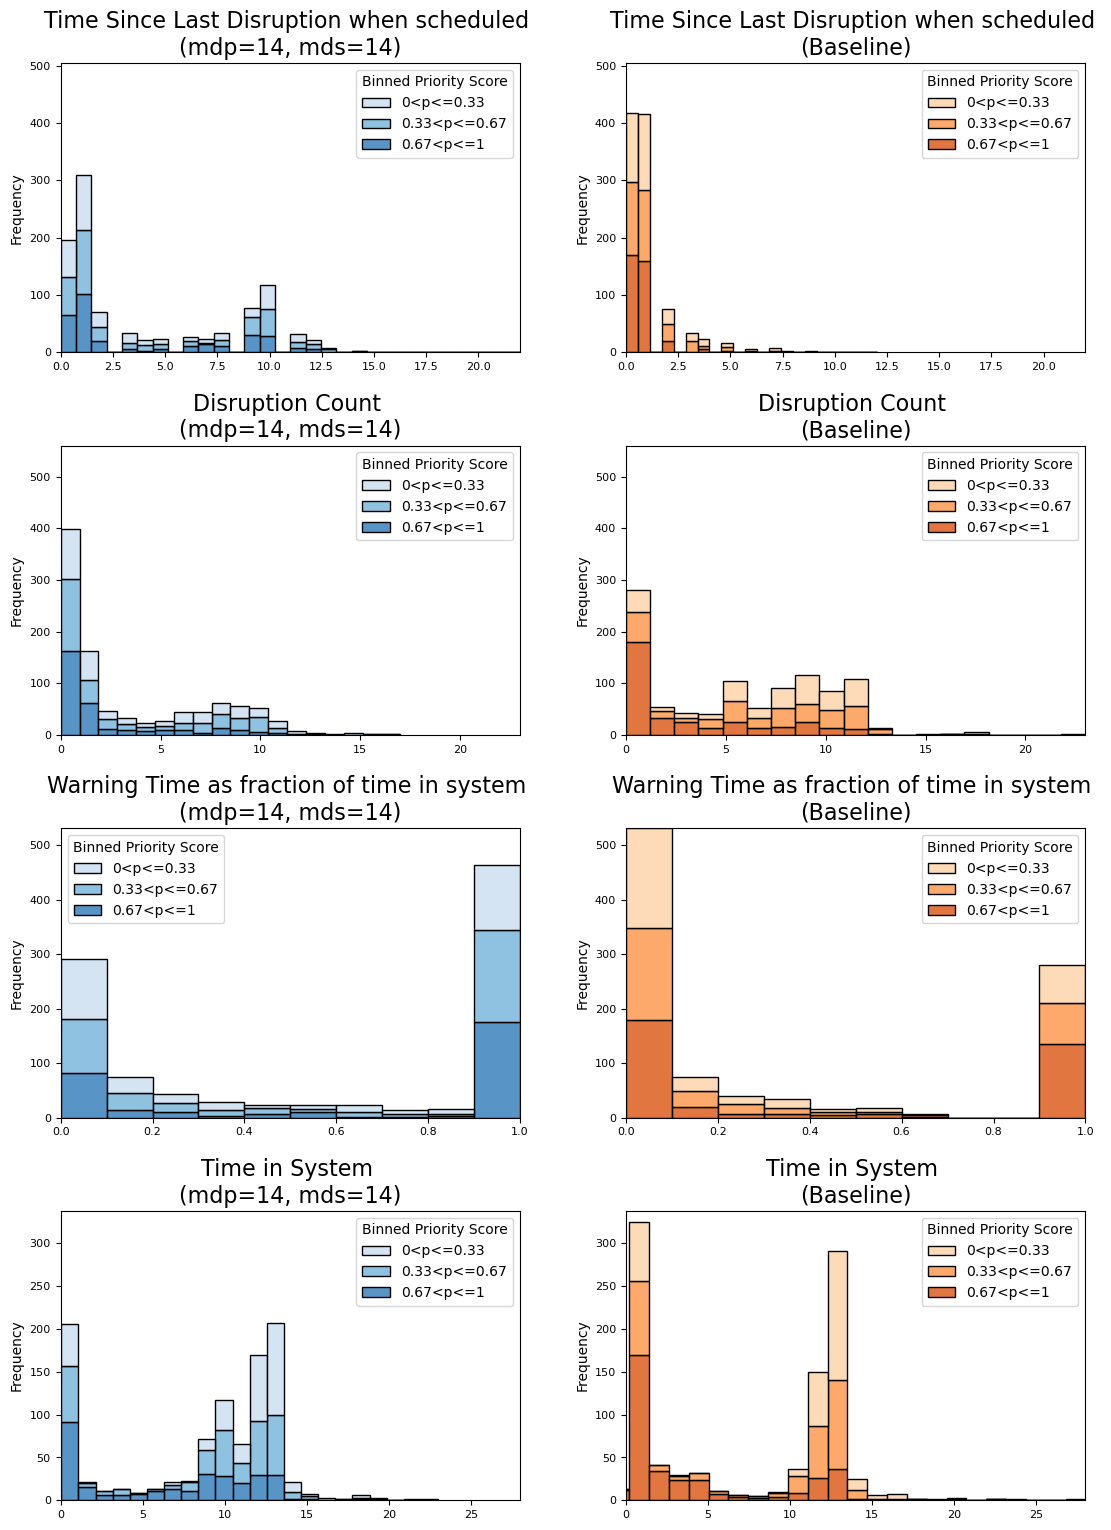

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# DISRUPTION_DIR = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code/output/plots/Brodie Plots/disruption sheets")

# Set the file path to your CSV
file_path_constraints = os.path.join(OUTPUT_DIR, 'priority&warnings_0_f_A_sd_1503_ed_1603_ipic_F_idce_T_mdp_14_mds_14_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv')
file_path_no_constraints = os.path.join(OUTPUT_DIR, 'priority&warnings_0_f_A_sd_1503_ed_1603_ipic_F_idce_F_mdp_-1_mds_-1_ipc_F_pv_50_ioc_F_dct_91_tl_20_og_05.csv')

# Read in the CSV files
df_constraints = pd.read_csv(file_path_constraints)
df_no_constraints = pd.read_csv(file_path_no_constraints)

# Sample 5000 random rows
df_constraints = df_constraints.sample(1000)
df_no_constraints = df_no_constraints.sample(1000)

labels = ["0<p<=0.33", "0.33<p<=0.67", "0.67<p<=1"]

# Bin priorities
df_constraints['Binned Priority Score'] = pd.cut(df_constraints['priority'], bins=3, labels=labels, include_lowest=True)
df_no_constraints['Binned Priority Score'] = pd.cut(df_no_constraints['priority'], bins=3, labels=labels, include_lowest=True)

# Create the new column 'time since last disruption when scheduled' for both DataFrames
df_constraints['time since last disruption when scheduled'] = df_constraints['warning time'] * df_constraints['time in system']
df_no_constraints['time since last disruption when scheduled'] = df_no_constraints['warning time'] * df_no_constraints['time in system']

# List of metrics to plot
metrics = ['time since last disruption when scheduled', 'count', 'warning time', 'time in system']

# Dictionary to map metric names to more appropriate names
metric_labels = {
    'time since last disruption when scheduled': 'Time Since Last Disruption when scheduled',
    'count': 'Disruption Count',
    'warning time': 'Warning Time as fraction of time in system',
    'time in system': 'Time in System'
}   

# Calculate global max for each metric and for the frequency
global_x_max = {}
global_y_max = {}

for metric in metrics:
    global_x_max[metric] = max(df_constraints[metric].max(), df_no_constraints[metric].max())
    
    # Get max frequency (y-axis) for both dataframes
    counts_constraints, _ = np.histogram(df_constraints[metric], bins='auto')
    counts_no_constraints, _ = np.histogram(df_no_constraints[metric], bins='auto')
    
    global_y_max[metric] = max(counts_constraints.max(), counts_no_constraints.max())

# Create a subplot grid with 4 rows (one for each metric) and 2 columns (one for each dataset)
fig, axes = plt.subplots(len(metrics), 2, figsize=(12, 16))
fig.tight_layout(pad=5.0)

# Plot histograms for each metric and color by 'priority'
for i, metric in enumerate(metrics):
    # Calculate the number of bins for each metric except 'warning time'
    if metric != 'warning time':
        bins_constraints = df_constraints[metric].nunique()
        bins_no_constraints = df_no_constraints[metric].nunique()
    else:
        # Use a default bin value for 'warning time'
        bins_constraints = bins_no_constraints = 10

    # Set the same x and y limits for both plots based on global max values
    x_max = global_x_max[metric]
    y_max = global_y_max[metric]

    # Plot for df_constraints
    sns.histplot(df_constraints, x=metric, hue='Binned Priority Score', multiple='stack', bins=bins_constraints, ax=axes[i, 0], palette='Blues')
    axes[i, 0].set_title(f'{metric_labels[metric]} \n(mdp=14, mds=14)', fontsize=16)
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlim(0, x_max)
    axes[i, 0].set_ylim(0, y_max)
    
    # Plot for df_no_constraints
    sns.histplot(df_no_constraints, x=metric, hue='Binned Priority Score', multiple='stack', bins=bins_no_constraints, ax=axes[i, 1], palette='Oranges')
    axes[i, 1].set_title(f'{metric_labels[metric]} \n(Baseline)', fontsize=16)
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].set_xlim(0, x_max)
    axes[i, 1].set_ylim(0, y_max)

# Display the plot
plt.show()
